In [1]:
import numpy as np
from pathlib import Path
import sys
sys.path.append(str(Path().resolve().parent))
from dataset_loading import dataset

BASE_DATA_DIR = Path().resolve().parent / ".cache" / "huggingface" / "datasets" 

/home/s6019595/UDL-MetaTrainingHyperNetwork/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
fashion_mnist = dataset.get_dataset(name="fashion_mnist", preprocess=True, to_tensor=False, flatten=False, resize=28, class_limit=10)
hebrew_chars= dataset.get_dataset(name="hebrew_chars", preprocess=True, to_tensor=False, flatten=False, resize=28, class_limit=20)
mnist = dataset.get_dataset(name="mnist", preprocess=True, to_tensor=False, flatten=False, resize=28, class_limit=10)
kmnist = dataset.get_dataset(name="kmnist", preprocess=True, to_tensor=False, flatten=False, resize=28, class_limit=10)
math_shapes = dataset.get_dataset(name="math_shapes", preprocess=True, to_tensor=False, flatten=False, resize=28, class_limit=8)

In [3]:
print("Hebrew chars: ",hebrew_chars)
print("Fashion MNIST: ", fashion_mnist)
print("MNIST: ", mnist)
print("KMNIST: ", kmnist)
print("Math Shapes: ", math_shapes)

Hebrew chars:  [DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3710
    })
})]
Fashion MNIST:  [DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})]
MNIST:  [DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})]
KMNIST:  [DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})]
Math Shapes:  [DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 12000
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 4000
    })
    test: Dataset({
        features:

In [11]:
train_fashion_mnist = fashion_mnist[0]["train"]
test_fashion_mnist = fashion_mnist[0]["test"]

train_hebrew_chars = hebrew_chars[0]["train"]

train_mnist = mnist[0]["train"]
test_mnist = mnist[0]["test"]

train_kmnist = kmnist[0]["train"]
test_kmnist = kmnist[0]["test"]

train_math_shapes = math_shapes[0]["train"]
test_math_shapes = math_shapes[0]["test"]

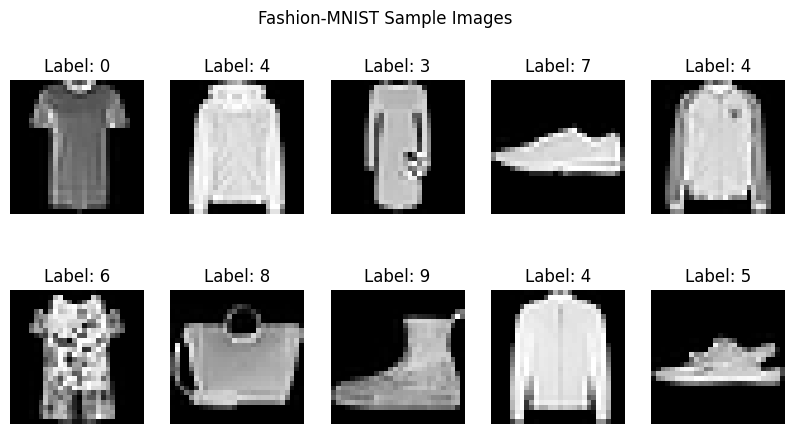

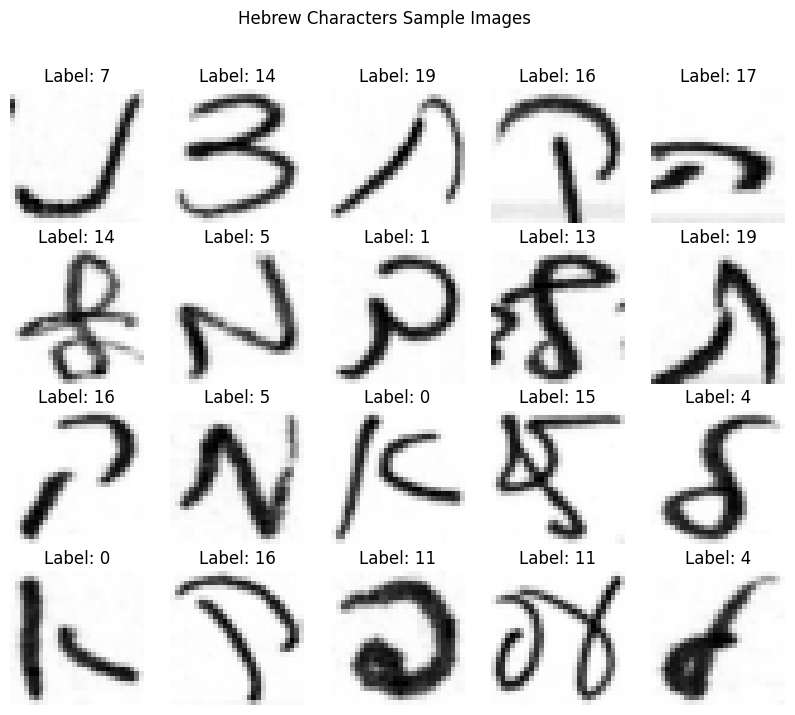

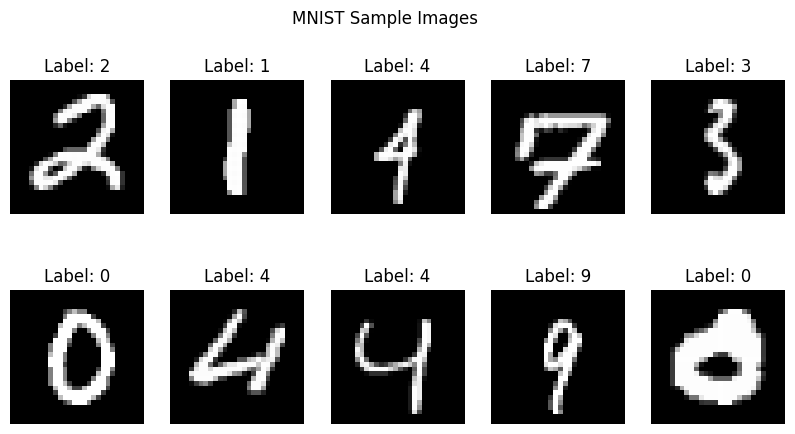

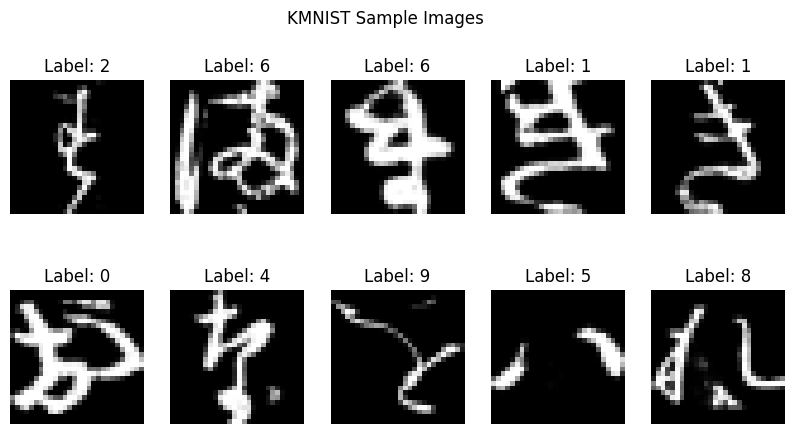

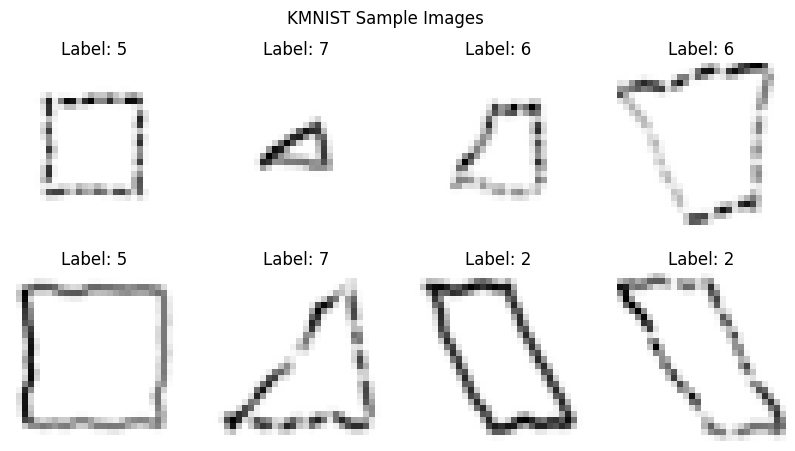

In [16]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,5, figsize=(10,5))
for i in range(10):
    ax = axs[i//5, i%5]
    random_index = np.random.randint(len(train_fashion_mnist))
    ax.imshow(train_fashion_mnist[random_index]["image"], cmap='gray')
    ax.set_title(f"Label: {train_fashion_mnist[random_index]['label']}")
    ax.axis('off')
    plt.suptitle("Fashion-MNIST Sample Images")

fig, axs = plt.subplots(4,5, figsize=(10,8))
for i in range(20):
    ax = axs[i//5, i%5]
    random_index = np.random.randint(len(train_hebrew_chars))
    ax.imshow(train_hebrew_chars[random_index]["image"], cmap='gray')
    ax.set_title(f"Label: {train_hebrew_chars[random_index]['label']}")
    ax.axis('off')
    plt.suptitle("Hebrew Characters Sample Images")

fig, axs = plt.subplots(2,5, figsize=(10,5))
for i in range(10):
    ax = axs[i//5, i%5]
    random_index = np.random.randint(len(train_mnist))
    ax.imshow(train_mnist[random_index]["image"], cmap='gray')
    ax.set_title(f"Label: {train_mnist[random_index]['label']}")
    ax.axis('off')
    plt.suptitle("MNIST Sample Images")

fig, axs = plt.subplots(2,5, figsize=(10,5))
for i in range(10):
    ax = axs[i//5, i%5]
    random_index = np.random.randint(len(train_kmnist))
    ax.imshow(train_kmnist[random_index]["image"], cmap='gray')
    ax.set_title(f"Label: {train_kmnist[random_index]['label']}")
    ax.axis('off')
    plt.suptitle("KMNIST Sample Images")

fig, axs = plt.subplots(2,4, figsize=(10,5))
for i in range(8):
    ax = axs[i//4, i%4]
    random_index = np.random.randint(len(train_math_shapes))
    ax.imshow(train_math_shapes[random_index]["image"], cmap='gray')
    ax.set_title(f"Label: {train_math_shapes[random_index]['label']}")
    ax.axis('off')
    plt.suptitle("KMNIST Sample Images")

In [ ]:
from utils.vae_net import VAE
import torch
vae_fashion_mnist = VAE(w=28, h=28, ls_dim=10, in_channels=1)
vae_kmnist = VAE(w=28, h=28, ls_dim=10, in_channels=1)
vae_mnist = VAE(w=28, h=28, ls_dim=10, in_channels=1)
vae_hebrew_chars = VAE(w=28, h=28, ls_dim=10, in_channels=1)
vae_math_shapes= VAE(w=28, h=28, ls_dim=8, in_channels=1)

ckpt = torch.load(Path().resolve().parent / "models" / "fashion_mnist_head_10.pth", map_location="cuda")
vae_fashion_mnist.load_state_dict(ckpt["hyper_state_dict"])
vae_fashion_mnist.to("cuda")
vae_fashion_mnist.eval()

ckpt = torch.load(Path().resolve().parent / "models" / "kmnist_head_10.pth", map_location="cuda")
vae_kmnist.load_state_dict(ckpt["hyper_state_dict"])
vae_kmnist.to("cuda")
vae_kmnist.eval()       

# ckpt = torch.load(Path().resolve().parent / "models" / "mnist_head_10.pth", map_location="cuda")
# vae_mnist.load_state_dict(ckpt["hyper_state_dict"])
# vae_mnist.to("cuda")
# vae_mnist.eval()

ckpt = torch.load(Path().resolve().parent / "models" / "hebrew_chars_head_10.pth", map_location="cuda")
vae_hebrew_chars.load_state_dict(ckpt["hyper_state_dict"])
vae_hebrew_chars.to("cuda")
vae_hebrew_chars.eval()

#ckpt = torch.load(Path().resolve().parent / "models" / "math_shapes_head_10.pth", map_location="cuda")
#vae_math_shapes.load_state_dict(ckpt["hyper_state_dict"])
#vae_math_shapes.to("cuda")
#vae_math_shapes.eval()

VAE(
  (encoder): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (shortcut): Conv2d(1, 32, kernel_size=(1, 1), stride=(2, 2), bias=False)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (shortcut): Conv2d(32, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
    )
    (2): ResidualBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (shortcut): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
  )
  (decoder): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Co

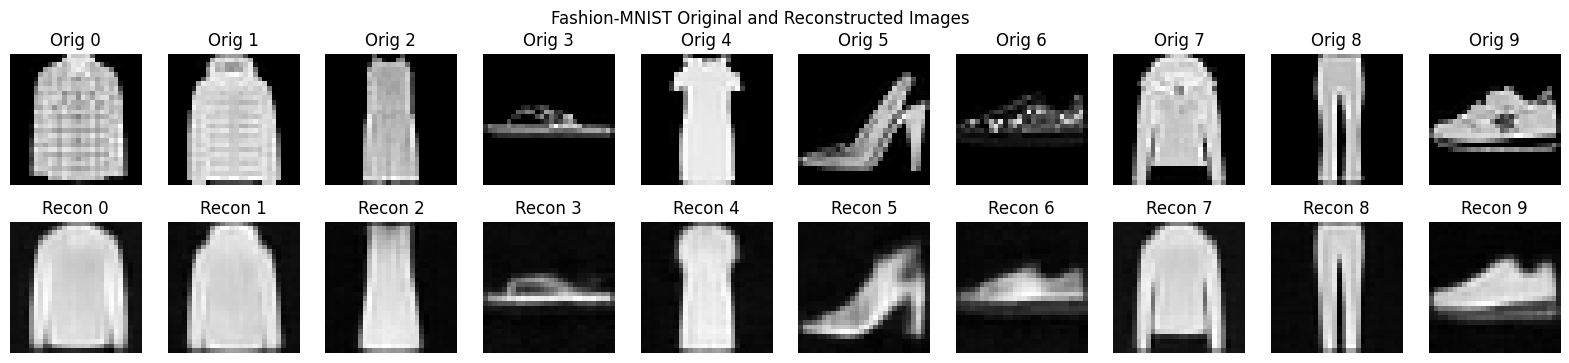

In [8]:
with torch.no_grad():
    sample_imgs = []
    for i in range(10):
        random_index = np.random.randint(len(test_fashion_mnist))
        img = test_fashion_mnist[random_index]["image"]
        img = np.array(img)
        img_tensor = torch.tensor(img).unsqueeze(0).unsqueeze(0).float().to("cuda") / 255.0
        recon_img, _, _ = vae_fashion_mnist(img_tensor)
        sample_imgs.append((img_tensor.squeeze().cpu().numpy(), recon_img.squeeze().cpu().numpy()))
    
    fig, axs = plt.subplots(2,10, figsize=(20,4))
    for i, (orig, recon) in enumerate(sample_imgs):
        axs[0,i].imshow(orig, cmap='gray')
        axs[0,i].set_title(f"Orig {i}")
        axs[0,i].axis('off')
        axs[1,i].imshow(recon, cmap='gray')
        axs[1,i].set_title(f"Recon {i}")
        axs[1,i].axis('off')
    plt.suptitle("Fashion-MNIST Original and Reconstructed Images")

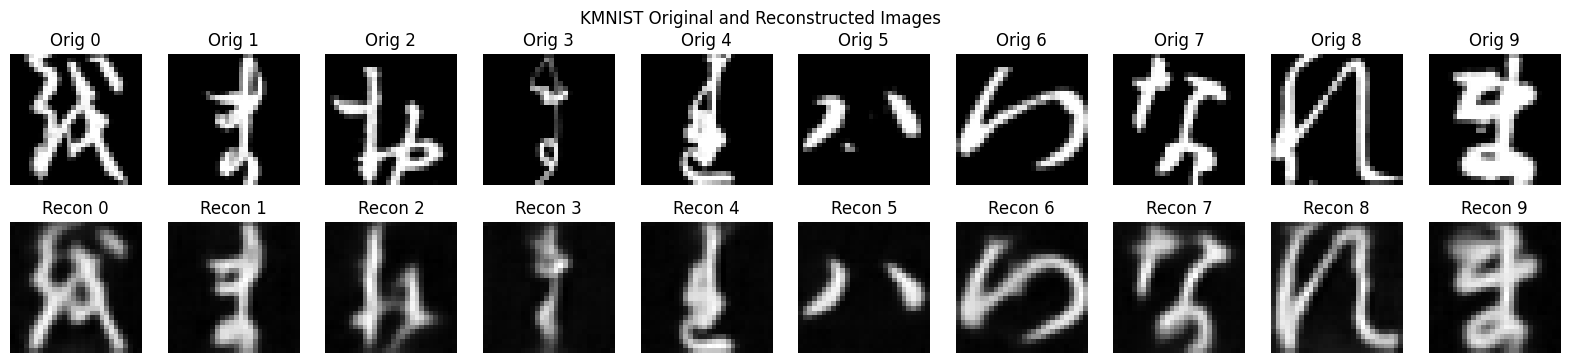

In [9]:
with torch.no_grad():
    sample_imgs = []
    for i in range(10):
        random_index = np.random.randint(len(test_kmnist))
        img = test_kmnist[random_index]["image"]
        img = np.array(img)
        img_tensor = torch.tensor(img).unsqueeze(0).unsqueeze(0).float().to("cuda") / 255.0
        recon_img, _, _ = vae_kmnist(img_tensor)
        sample_imgs.append((img_tensor.squeeze().cpu().numpy(), recon_img.squeeze().cpu().numpy()))
    
    fig, axs = plt.subplots(2,10, figsize=(20,4))
    for i, (orig, recon) in enumerate(sample_imgs):
        axs[0,i].imshow(orig, cmap='gray')
        axs[0,i].set_title(f"Orig {i}")
        axs[0,i].axis('off')
        axs[1,i].imshow(recon, cmap='gray')
        axs[1,i].set_title(f"Recon {i}")
        axs[1,i].axis('off')
    plt.suptitle("KMNIST Original and Reconstructed Images")

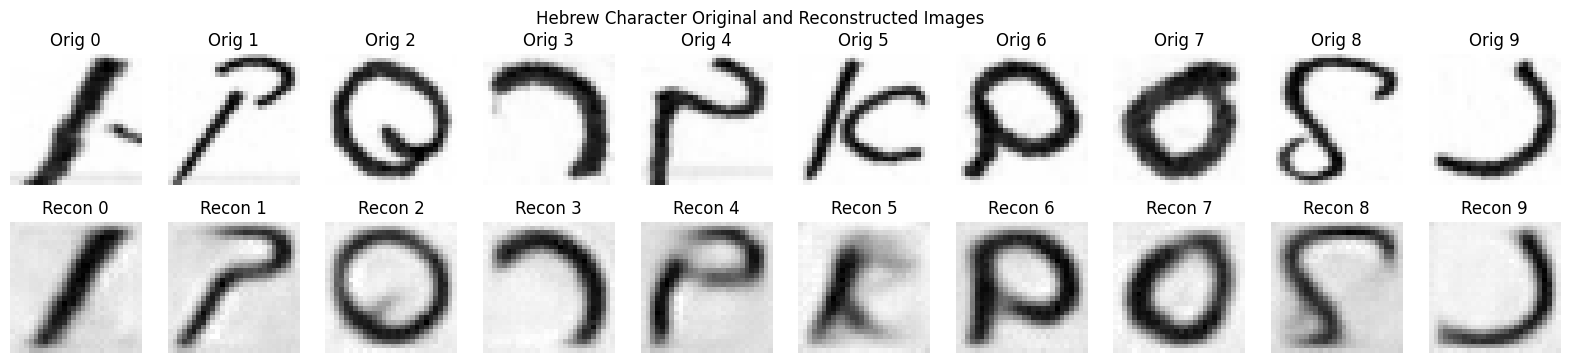

In [10]:
with torch.no_grad():
    sample_imgs = []
    for i in range(10):
        random_index = np.random.randint(len(train_hebrew_chars))
        img = train_hebrew_chars[random_index]["image"]
        img = np.array(img)
        img_tensor = torch.tensor(img).unsqueeze(0).unsqueeze(0).float().to("cuda") / 255.0
        recon_img, _, _ = vae_hebrew_chars(img_tensor)
        sample_imgs.append((img_tensor.squeeze().cpu().numpy(), recon_img.squeeze().cpu().numpy()))
    
       
    fig, axs = plt.subplots(2,10, figsize=(20,4))
    for i, (orig, recon) in enumerate(sample_imgs):
        axs[0,i].imshow(orig, cmap='gray')
        axs[0,i].set_title(f"Orig {i}")
        axs[0,i].axis('off')
        axs[1,i].imshow(recon, cmap='gray')
        axs[1,i].set_title(f"Recon {i}")
        axs[1,i].axis('off')
    plt.suptitle("Hebrew Character Original and Reconstructed Images")
    